In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
lymphdata = pd.read_csv("lymphography.csv", header=None)

In [58]:
lymphdata.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [59]:
lymphdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       148 non-null    int64
 1   1       148 non-null    int64
 2   2       148 non-null    int64
 3   3       148 non-null    int64
 4   4       148 non-null    int64
 5   5       148 non-null    int64
 6   6       148 non-null    int64
 7   7       148 non-null    int64
 8   8       148 non-null    int64
 9   9       148 non-null    int64
 10  10      148 non-null    int64
 11  11      148 non-null    int64
 12  12      148 non-null    int64
 13  13      148 non-null    int64
 14  14      148 non-null    int64
 15  15      148 non-null    int64
 16  16      148 non-null    int64
 17  17      148 non-null    int64
 18  18      148 non-null    int64
dtypes: int64(19)
memory usage: 22.1 KB


In [60]:
lymphdata.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
5,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4
6,2,2,2,1,1,1,1,1,2,1,2,3,2,3,8,2,1,1,1
7,2,3,2,1,1,1,2,1,2,1,2,2,2,2,1,3,1,1,1
8,3,2,2,1,1,1,1,1,2,1,3,2,2,2,8,3,1,2,5
9,3,2,1,1,1,1,1,1,2,1,2,2,3,3,5,3,1,1,2


In [61]:
# Add attributes to the csv file
lymphdata.columns = attributes = [
    "class",
    "lymphatics",
    "block of affere",
    "bl. of lymph. c",
    "bl. of lymph. s",
    "by pass",
    "extravasates",
    "regeneration of",
    "early uptake in",
    "lym.nodes dimin",
    "lym.nodes enlar",
    "changes in lym.",
    "defect in node",
    "changes in node",
    "changes in stru",
    "special forms",
    "dislocation of",
    "exclusion of no",
    "no. of nodes in"
]
lymphdata.head(10)

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
5,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4
6,2,2,2,1,1,1,1,1,2,1,2,3,2,3,8,2,1,1,1
7,2,3,2,1,1,1,2,1,2,1,2,2,2,2,1,3,1,1,1
8,3,2,2,1,1,1,1,1,2,1,3,2,2,2,8,3,1,2,5
9,3,2,1,1,1,1,1,1,2,1,2,2,3,3,5,3,1,1,2


In [62]:
lymphdata.isna().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym.    0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

In [63]:
lymphdata.isnull().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym.    0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

In [64]:
lymphodata_cleaned = lymphdata.drop(columns=["block of affere", "bl. of lymph. c", "bl. of lymph. s", "by pass"])
lymphodata_cleaned.head()
lymphodata_cleaned.to_csv("lymphodata_clean.csv")

In [65]:
# Features
X = lymphodata_cleaned.drop(columns=["class"])

In [66]:
# Target
y = lymphodata_cleaned["class"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.47, stratify=y, random_state=10)
print(len(X_train), len(X_test))

78 70


In [68]:
model = DecisionTreeClassifier(criterion='gini',
                               min_samples_leaf=5,
                               min_samples_split=5,
                               max_depth=None,
                               random_state=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, random_state=10)

In [69]:
preds = model.predict(X_test)

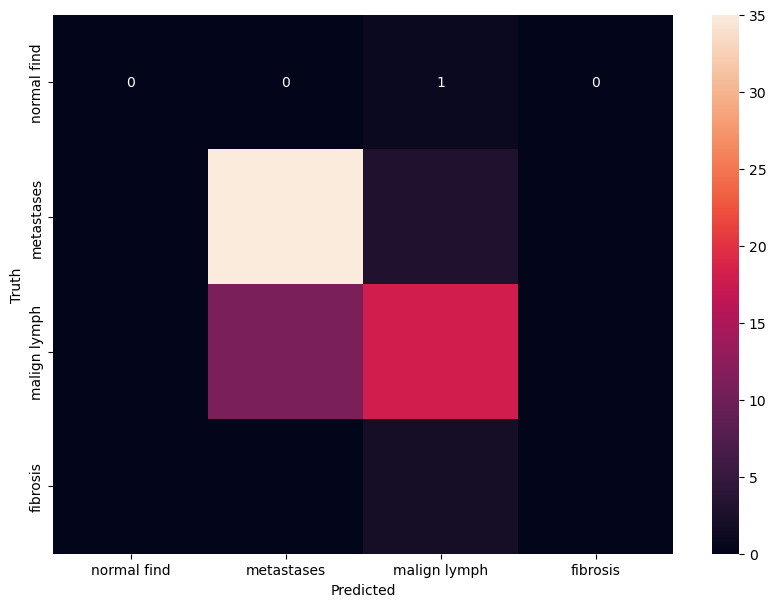

In [70]:
cm = confusion_matrix(y_test, preds)
class_labels = ['normal find', 'metastases', 'malign lymph', 'fibrosis']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [71]:
print(f"Accuracy: {model.score(X_test, y_test)}")

Accuracy: 0.7571428571428571
